In [ ]:
'''
note
2020.07.16 sunghyun created
'''

In [5]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

def feature_extract(output_dir, wav_file_path, sample_rate, n_mels=128, frame_length=0.025, frame_stride=0.01):
    filename = wav_file_path.split('/')[-1]
    filename = filename.split('.')[0]
    y, sr = librosa.load(wav_file_path, sr=sample_rate)
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))
    spec = librosa.feature.melspectrogram(y=y, n_mels=n_mels, n_fft=input_nfft, hop_length=input_stride)
    librosa.display.specshow(librosa.power_to_db(spec, ref=np.max),sr=sr, hop_length=input_stride,x_axis=None, y_axis=None)
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.axis('off')
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
    print('save ...')
    plt.savefig('{}/{}.png'.format(output_dir, filename), bbox_inches='tight', pad_inches=0)
    print('finish ...')
    
    
def get_melspectrogram_features(input_dir, output_dir, sample_rate, n_mels=128, frame_length=0.025, frame_stride=0.01):
    data_lists = glob.glob(os.path.join(input_dir, '**', '*.wav'), recursive=True)
    
    try:
        if not(os.path.isdir(output_dir)):
            os.makedirs(os.path.join(output_dir))
    except OSError as e:
        print("failed to create DIRECTROY!")
        raise
    
    for idx, data in enumerate(data_lists):
        feature_extract(output_dir, data, sample_rate, n_mels=n_mels, frame_length=frame_length, frame_stride=frame_stride)
        

save ...
finish ...
save ...
finish ...
save ...
finish ...


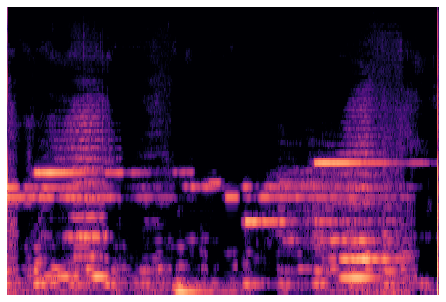

In [8]:
get_melspectrogram_features('./', 'original_mel', 22500)